In [1]:
import nltk
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    return text

# Apply preprocessing to all documents
newsgroups_data = [preprocess_text(text) for text in newsgroups.data]

# Define stopwords
stop_words = stopwords.words('english')

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(newsgroups_data)

print(f"Shape of the TF-IDF matrix: {X.shape}")


Shape of the TF-IDF matrix: (18846, 141321)


Apply NMF for Topic Modeling

In [3]:
from sklearn.decomposition import NMF

# Set the number of topics you want to extract
num_topics = 5

# Apply NMF
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

# Show the topics (top words for each topic)
n_top_words = 10  # Show top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(H):
     print(f"Topic #{topic_idx + 1}:")
     print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
     print()


Topic #1:
would, dont, people, one, think, like, get, well, time, good

Topic #2:
windows, file, dos, program, files, use, window, using, version, system

Topic #3:
god, jesus, bible, believe, christian, faith, christ, christians, gods, people

Topic #4:
thanks, please, anyone, email, know, would, advance, im, looking, hi

Topic #5:
drive, scsi, card, disk, ide, hard, drives, controller, bus, system



Visualize the topics

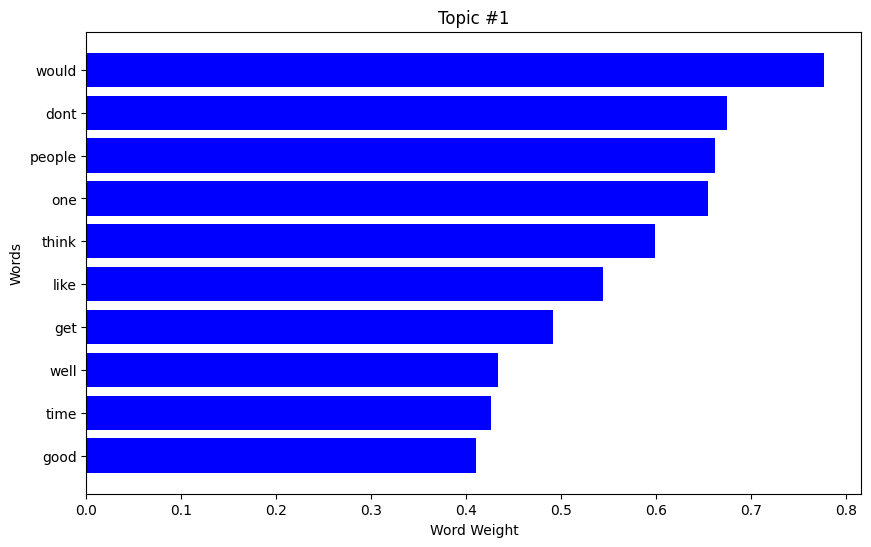

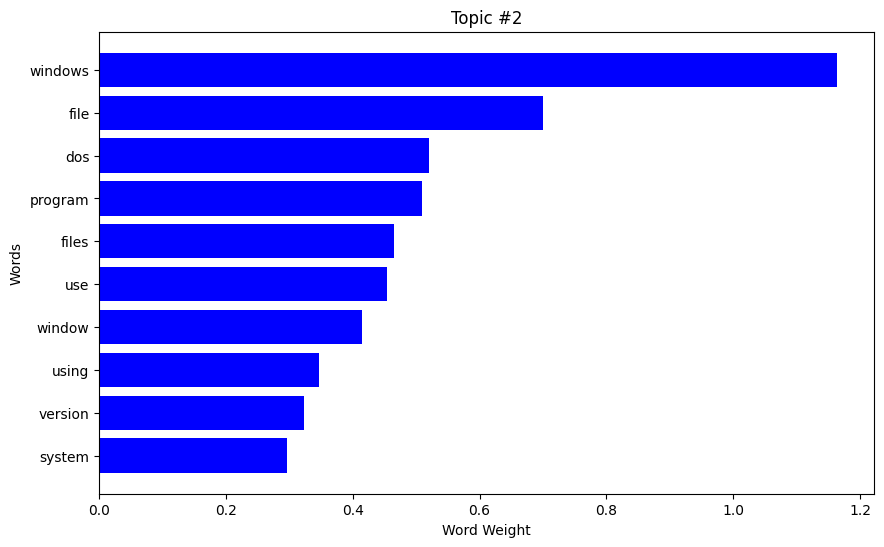

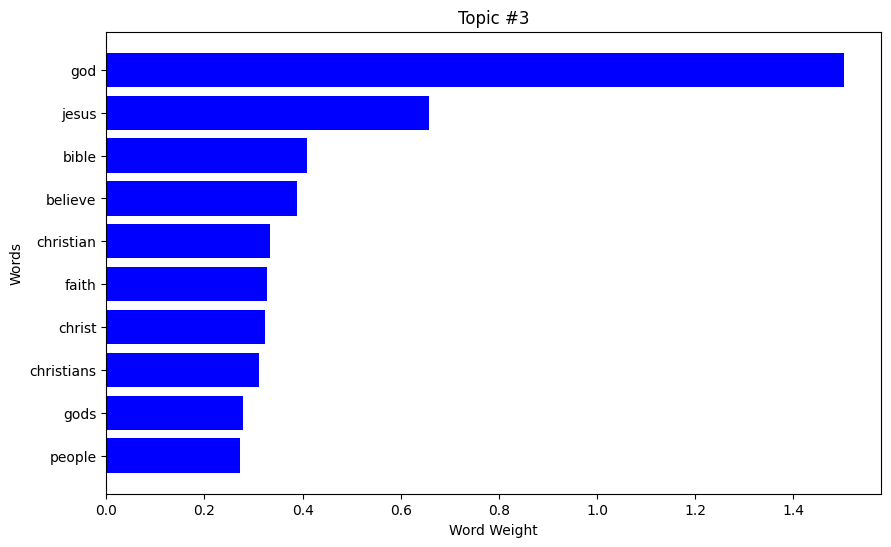

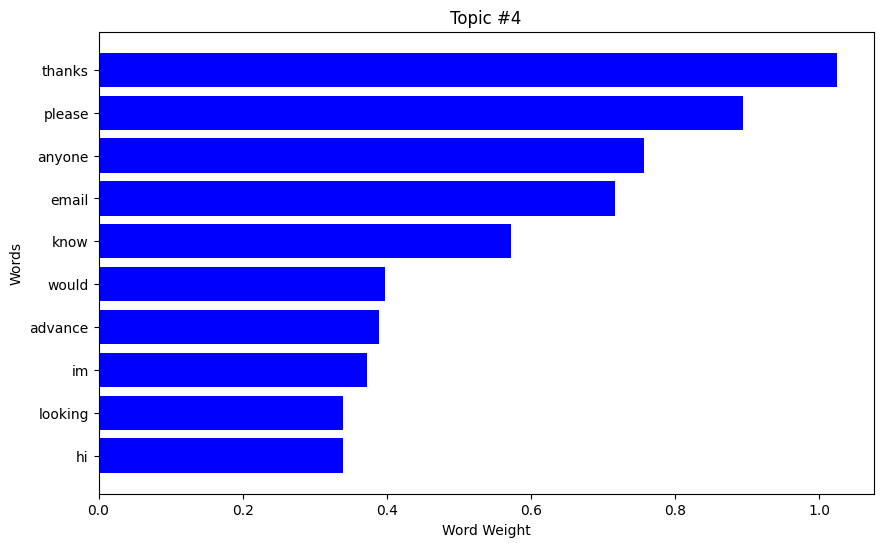

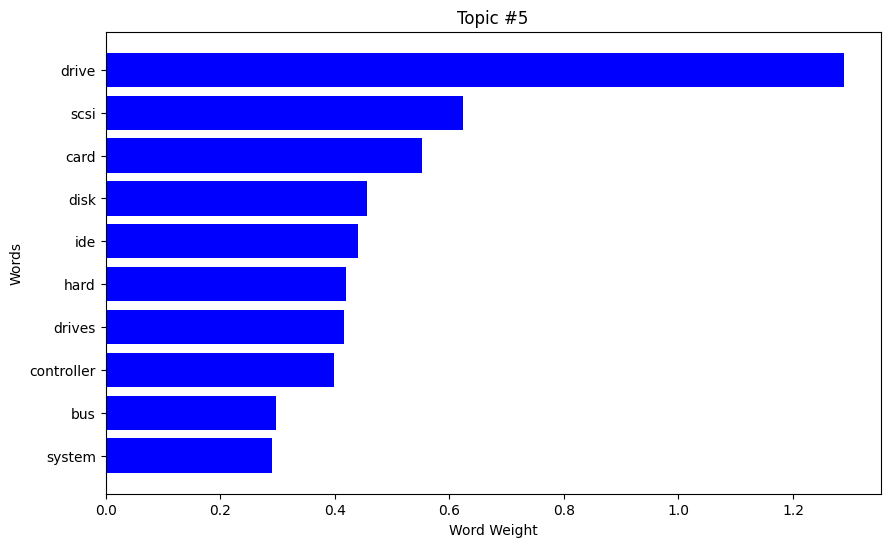

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot top words for each topic
n_top_words = 10
for topic_idx, topic in enumerate(H):
     plt.figure(figsize=(10, 6))
     top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
     top_words = [feature_names[i] for i in top_words_idx]
     top_weights = [topic[i] for i in top_words_idx]
     
     plt.barh(top_words, top_weights, color='blue')
     plt.title(f"Topic #{topic_idx + 1}")
     plt.xlabel('Word Weight')
     plt.ylabel('Words')
     plt.gca().invert_yaxis()
     plt.show()


Assign Topics to Documents

In [5]:
# Assign the most dominant topic to each document
dominant_topics = W.argmax(axis=1)

# Print the dominant topic for the first few documents
for i in range(5):
     print(f"Document #{i+1} - Topic {dominant_topics[i]}")
     print(newsgroups.data[i][:200])  # Print the first 200 characters of the document
     print()


Document #1 - Topic 0


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However,

Document #2 - Topic 4
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenh

Document #3 - Topic 0




	Finally you said what you dream about. Mediterranean???? That was new....
	The area will be "greater" after some years, like your "holocaust" numbers......




		*****
	Is't July in USA now????? 

Document #4 - Topic 4

Think!

It's the SCSI card doing the DMA transfers NOT the disks...

The SCSI card can do DMA transfers containing data from any of the SCSI devices
it is attached when it wants to.

An important fea

Document #5 - Topic 4
1)    I have an old Jasmine drive which I cannot use with my new system.
 My under